In [35]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import date,timedelta
from matplotlib import dates
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import seaborn as sns
import pandas_ta as ta
import numpy as np

In [36]:
today = date.today()

d1 = today.strftime('%Y-%m-%d')
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

In [37]:
ticker = input('Write ticker: ')
stock_data = yf.download(ticker, start = start_date, end = end_date, progress=False)
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-26,0.408410,0.412276,0.395086,0.396629,0.396629,614794664
2022-11-27,0.396606,0.407911,0.395971,0.396821,0.396821,630018233
2022-11-28,0.396801,0.398779,0.375520,0.390318,0.390318,1179083829
2022-11-29,0.390279,0.402976,0.384255,0.398549,0.398549,969049648
2022-11-30,0.398553,0.410814,0.395180,0.408743,0.408743,933343511
...,...,...,...,...,...,...
2024-11-20,1.101943,1.146637,1.063748,1.102301,1.102301,6409028714
2024-11-21,1.102305,1.251770,1.082094,1.250352,1.250352,10451562188
2024-11-22,1.250239,1.496907,1.247561,1.469019,1.469019,19984456169


In [38]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2022-11-26 to 2024-11-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       730 non-null    float64
 1   High       730 non-null    float64
 2   Low        730 non-null    float64
 3   Close      730 non-null    float64
 4   Adj Close  730 non-null    float64
 5   Volume     730 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 39.9 KB


In [39]:
stock_data = stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]


In [40]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-26,0.408410,0.412276,0.395086,0.396629,0.396629,614794664
2022-11-27,0.396606,0.407911,0.395971,0.396821,0.396821,630018233
2022-11-28,0.396801,0.398779,0.375520,0.390318,0.390318,1179083829
2022-11-29,0.390279,0.402976,0.384255,0.398549,0.398549,969049648
2022-11-30,0.398553,0.410814,0.395180,0.408743,0.408743,933343511


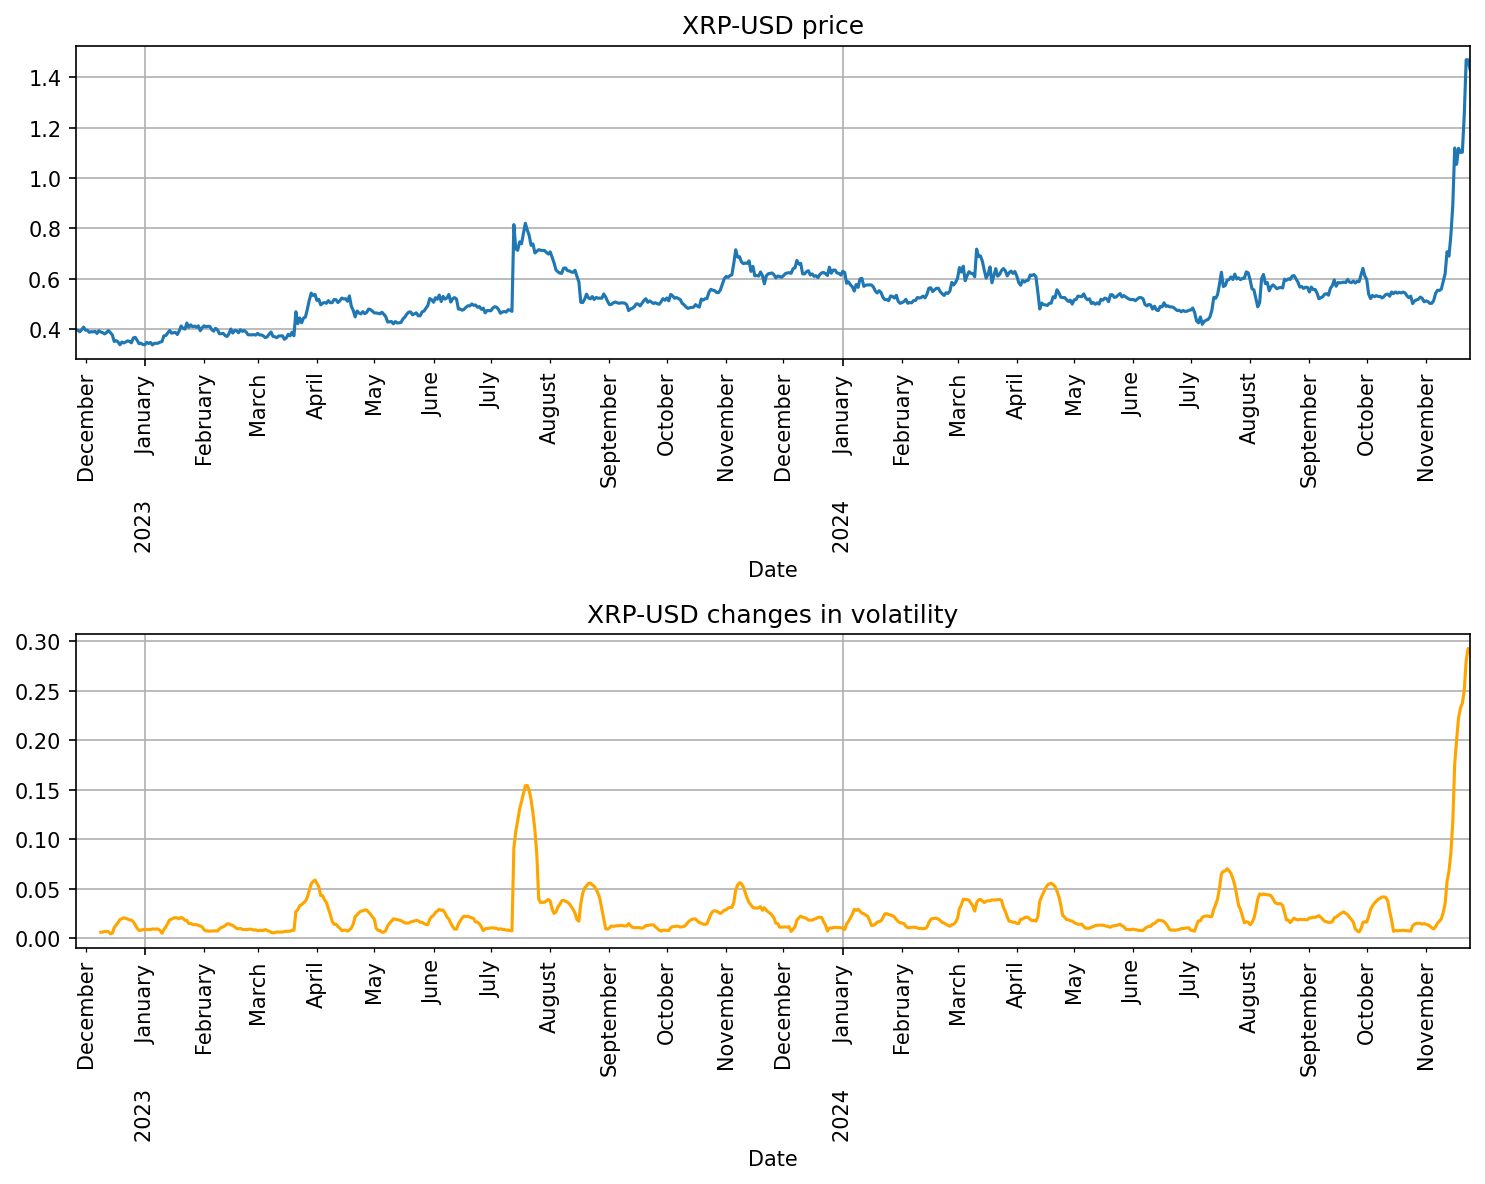

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,8), dpi=150)
stock_data['Adj Close'].plot(ax=ax[0])
ax[0].set_title(f'{ticker} price')
ax[0].xaxis.set_major_locator(dates.YearLocator())
ax[0].xaxis.set_major_formatter(dates.DateFormatter('%Y       %B'))
ax[0].tick_params(axis='x', which = 'major', rotation = 90)
ax[0].xaxis.set_minor_locator(dates.MonthLocator())
ax[0].xaxis.set_minor_formatter(dates.DateFormatter('%B'))
ax[0].tick_params(axis='x', which = 'minor', rotation = 90)

ax[0].xaxis.grid()
ax[0].yaxis.grid()

#Voltality
stock_data['Adj Close'].rolling(14).std().plot(ax=ax[1], c='orange')
ax[1].set_title(f'{ticker} changes in volatility')
ax[1].xaxis.set_major_locator(dates.YearLocator())
ax[1].xaxis.set_major_formatter(dates.DateFormatter('%Y       %B'))
ax[1].tick_params(axis='x', which = 'major', rotation = 90)
ax[1].xaxis.set_minor_locator(dates.MonthLocator())
ax[1].xaxis.set_minor_formatter(dates.DateFormatter('%B'))
ax[1].tick_params(axis='x', which = 'minor', rotation = 90)

ax[1].xaxis.grid()
ax[1].yaxis.grid()

plt.tight_layout()
plt.show()

In [42]:
fig = px.line(data_frame = stock_data, x=stock_data.index, y='Close', title= 'Stock market line plot')
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=7, label="7d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()


In [43]:
figure = go.Figure(data=[go.Candlestick(x=stock_data.index, open=stock_data['Open'], high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'])])
title = 'CandleStick of stock market'
figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=7, label="7d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

In [44]:
#RSI, Garman, ATR, MACD
stock_data['RSI'] = ta.rsi(close = stock_data["Adj Close"], length=14)

stock_data['Garman'] = ((np.log(stock_data['High'])- np.log(stock_data['Low']))**2)/2-(2*np.log(2)-1)*((np.log(stock_data['Adj Close']) -np.log(stock_data['Open']))**2)

def compute_atr(stock_data):
    atr = ta.atr(high=stock_data['High'], low=stock_data['Low'], close=stock_data['Close'], length=14)
    return atr.sub(atr.mean()).div(atr.std())
stock_data['ATR'] = compute_atr(stock_data)

def compute_macd(stock_data):
    macd = ta.macd(close=stock_data['Close'], length = 14).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())
stock_data['MACD'] = compute_macd(stock_data)

today = date.today() 
two_weeks = today - timedelta(days=14)

#Last 14 days
technical_analysis = stock_data.iloc[-14:]
technical_analysis



,Open,High,Low,Close,Adj Close,Volume,RSI,Garman,ATR,MACD
Date,,,,,,,,,,
2024-11-11,0.589382,0.630706,0.572024,0.620467,0.620467,4066959667,75.591804,0.003748,-0.054976,0.298333
2024-11-12,0.620467,0.735353,0.599107,0.707699,0.707699,11156505329,84.527735,0.014310,0.615991,0.747335
2024-11-13,0.707636,0.743535,0.642591,0.690288,0.690288,7773620799,78.361247,0.010406,1.027763,1.034294
2024-11-14,0.690288,0.845211,0.684417,0.773007,0.773007,9458526339,84.242720,0.017316,1.768301,1.505621
2024-11-15,0.773008,0.924821,0.772579,0.892091,0.892091,11738281623,88.914196,0.008246,2.404764,2.230279
2024-11-16,0.892092,1.256744,0.879924,1.119090,1.119090,22568823580,93.108391,0.043673,4.339773,3.484212
2024-11-17,1.119088,1.154595,1.005463,1.054335,1.054335,12066098151,83.413326,0.008191,4.773947,4.221877
2024-11-18,1.054344,1.183342,1.054314,1.117936,1.117936,9978319005,85.058910,0.005340,5.056794,4.949930
2024-11-19,1.117894,1.145794,1.073827,1.101947,1.101947,5884163705,82.833997,0.002024,4.977950,5.412093


In [45]:
#MA
stock_data['M10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['M20'] = stock_data['Close'].rolling(window=20).mean()

#Bolinger Bands
stock_data['SD'] = stock_data['Close'].rolling(window=20).std()
# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
stock_data['UB'] = stock_data['M20'] + 2 * stock_data['SD']
stock_data['LB'] = stock_data['M20'] - 2 * stock_data['SD']


In [62]:
fig = go.Figure()

# Add the price chart (default)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price'))

# Add the RSI chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='RSI', visible=False))

# Add the MACD chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['MACD'], mode='lines', name='MACD', visible=False))

# Add the Bollinger Bands chart (initially hidden)
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['UB'], mode='lines', name='Upper Bollinger Band', visible=False, line=dict(color='red')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['LB'], fill='tonexty', mode='lines', name='Lower Bollinger Band', visible=False, line=dict(color='green')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['M20'], mode='lines', name='Middle Bollinger Band', visible=False, line=dict(color='blue')))
fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Price (Bollinger)', visible=False, line=dict(color='black')))

# Define the buttons for dropdown menu
buttons = [
    dict(label='Price', method='update', args=[{'visible': [True, False, False, False, False, False, False]}, {'title': 'Stock market line plot in USD'}]),
    dict(label='RSI', method='update', args=[{'visible': [False, True, False, False, False, False, False]}, {'title': 'RSI Indicator'}]),
    dict(label='MACD', method='update', args=[{'visible': [False, False, True, False, False, False, False]}, {'title': 'MACD Indicator'}]),
    dict(label='Bollinger Bands', method='update', args=[{'visible': [False, False, False, True, True, True, True]}, {'title': 'Bollinger Bands'}])
]

# Create the dropdown menu
dropdown = go.layout.Updatemenu(
    buttons=buttons,
    direction='down',
    showactive=True,
    xanchor='left',
    yanchor='top',
    x=0.1,
    y=1.1
)

# Update layout to include dropdown menu and other customizations
fig.update_layout(
    updatemenus=[dropdown],
    plot_bgcolor='lightgray',   # Background color of the plotting area
    font=dict(family='Arial', size=12),
    title_font=dict(size=20),
    title_x=0.5,
    xaxis_title='Date',
    yaxis_title='Count',
    hoverlabel=dict(bgcolor='lightgrey', font_size=14),
    margin=dict(l=100, r=100, t=100, b=100),
    showlegend=True
)
# Show the figure
fig.show()


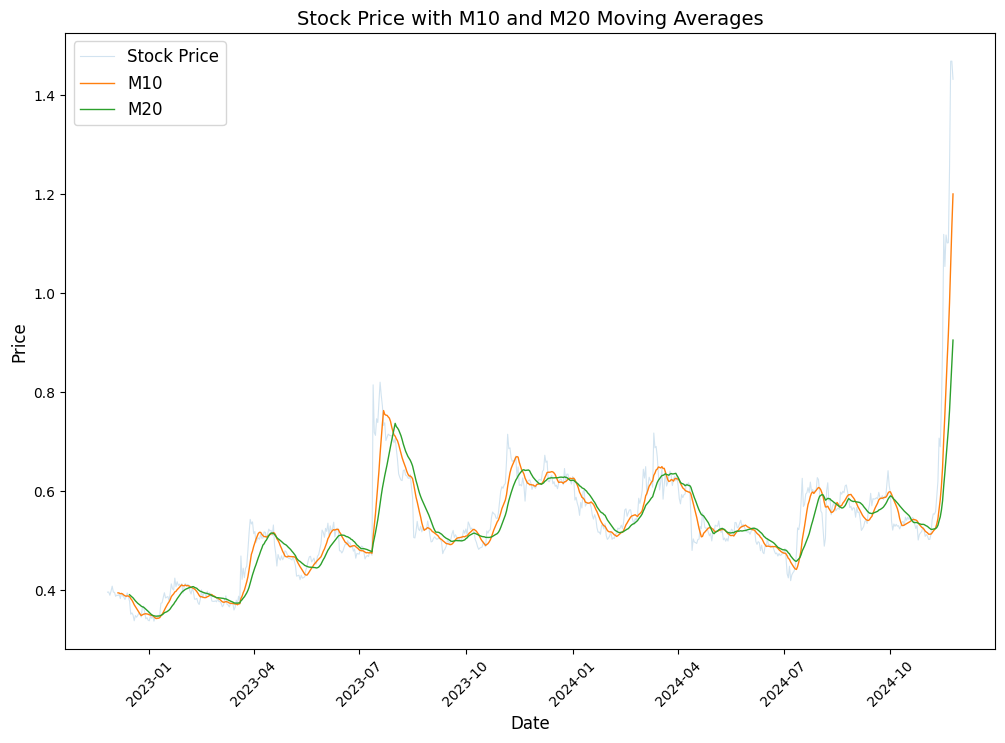

In [47]:
plt.figure(figsize=(12,8))
plt.plot(stock_data.index, stock_data['Close'], label='Stock Price', linewidth=0.8, alpha=0.2)

plt.plot(stock_data.index, stock_data['M10'], label='M10', linewidth=1, alpha=1)
plt.plot(stock_data.index, stock_data['M20'], label='M20', linewidth=1, alpha=1)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Stock Price with M10 and M20 Moving Averages', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(rotation=45)
plt.show()

Machine Learning Models

In [48]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam

2024-11-25 14:24:58.101624: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'RSI', 'Garman',
       'ATR', 'MACD', 'M10', 'M20', 'SD', 'UB', 'LB'],
      dtype='object')

In [50]:
X = stock_data[['Open', 'High', 'Low', 'Volume']].to_numpy()
y = stock_data['Close'].to_numpy()

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [51]:
model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()     

/opt/anaconda3/envs/DataScience/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 128)         │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         3,225 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,931 (792.70 KB)

 Trainable params: 202,931 (792.70 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=1, epochs=30)

Epoch 1/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0207 - val_loss: 0.0010
Epoch 2/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0038 - val_loss: 1.3214e-04
Epoch 3/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 4.0314e-04 - val_loss: 3.1128e-04
Epoch 4/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.3859e-04 - val_loss: 3.2194e-04
Epoch 5/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4090e-04 - val_loss: 8.1739e-04
Epoch 6/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 6.8686e-04 - val_loss: 1.4572e-04
Epoch 7/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.7262e-04 - val_loss: 3.6057e-04
Epoch 8/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.7465e-04 - val_loss: 1.3140e-04
Epoch 9/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0326e-04 - val_loss: 5.3077e-04
Epoch 10/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.1804e-04 - val_loss: 1.5918e-04
Epoch 11/30
584/584 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.3424e-04

<Axes: >

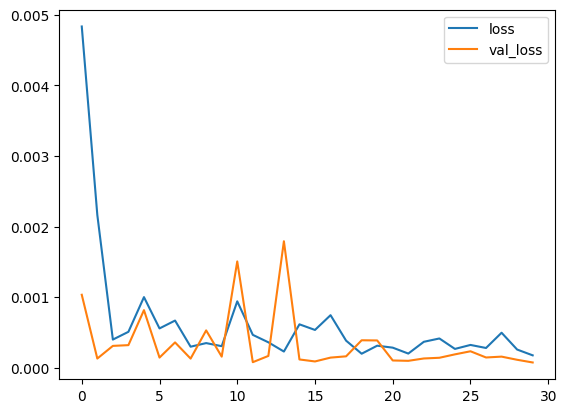

In [53]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [54]:
features = stock_data[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
features_scaled = scaler.transform(features)
features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Making a prediction
prediction = model.predict(features_scaled)
print(prediction)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
[[1.3978047]]


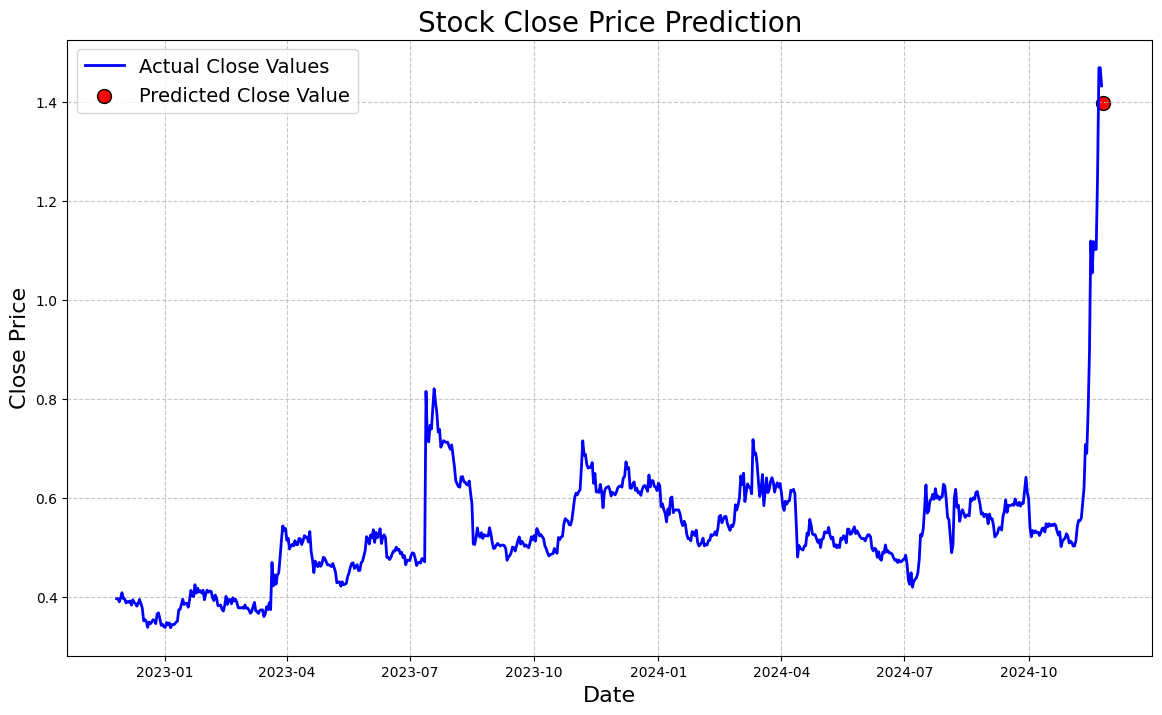

In [55]:
plt.figure(figsize=(14, 8))

# Plotting the actual close values
plt.plot(stock_data.index, stock_data['Close'], label='Actual Close Values', color='blue', linewidth=2)

# Plotting the predicted value
plt.scatter(stock_data.index[-1] + pd.DateOffset(1), prediction, color='red', label='Predicted Close Value', s=100, edgecolors='black')

# Adding grid lines for better visibility
plt.grid(True, linestyle='--', alpha=0.7)

# Adding titles and labels with larger font sizes
plt.title('Stock Close Price Prediction', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)

# Adding a legend with a larger font size
plt.legend(fontsize=14)

# Display the plot
plt.show()

In [56]:
forecast_data = stock_data.reset_index().rename(columns={"Date": "ds", "Close": "y"})


In [57]:
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=720)
predictions = model.predict(forecasts)
fig_forecast = plot_plotly(model, predictions)
fig_forecast.update_layout(title='Stock Price Forecast', xaxis_title='Date', yaxis_title='Price')
fig_forecast.show()


14:25:55 - cmdstanpy - INFO - Chain [1] start processing
14:25:56 - cmdstanpy - INFO - Chain [1] done processing


In [58]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(400)

print(predicted_prices)

14:25:56 - cmdstanpy - INFO - Chain [1] start processing
14:25:56 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat
360 2023-11-21  0.585296
361 2023-11-22  0.585468
362 2023-11-23  0.587385
363 2023-11-24  0.588246
364 2023-11-25  0.590842
..         ...       ...
755 2024-12-20  0.734650
756 2024-12-21  0.738263
757 2024-12-22  0.737412
758 2024-12-23  0.735840
759 2024-12-24  0.737642

[400 rows x 2 columns]


In [60]:
model = Prophet()
model.fit(forecast_data)

future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

predicted_prices = forecast[['ds', 'yhat']].tail(700)

trace1 = go.Scatter(x=forecast_data['ds'], y=forecast_data['y'], mode='lines+markers', name='Historical Data', marker=dict(color='blue'))

trace2 = go.Scatter(x=predicted_prices['ds'], y=predicted_prices['yhat'], mode='lines+markers', name='Predicted Prices', marker=dict(color='red'))

layout = go.Layout(
    title=f'Historical and Predicted Prices for {ticker}',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Price'),
    legend=dict(x=0.7, y=1),
    hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

14:26:44 - cmdstanpy - INFO - Chain [1] start processing
14:26:45 - cmdstanpy - INFO - Chain [1] done processing
